# What's! That! Digit!!!

<span style="color:#cc0000">Lomuto: </span>Ladies and gentlemen, we have an exciting show for you tonight; aspiring data scientist and amateur software engineer Michael Liu will be tacking the classic problem of identifying digits from their gray-scale pixel values!

<span style="color:#0000cc">Hoare: </span>That's right, Lomuto! Each digit will be presented to the contestant as a 28x28 pixel image, with each pixel being represented by an integer between 0 and 255.

<span style="color:#cc0000">Lomuto: </span>But of course, the dataset file itself represents each image as a single 784-element row, plus one for the label, to make calculations a bit easier.

<span style="color:#0000cc">Hoare: </span>Though it would have been perfectly possible to preprocess that manually.

<span style="color:#cc0000">Lomuto: </span>Of course, of course,. But our audience tonight wants to see excitement, not mundane number processing.

<span style="color:#0000cc">Hoare: </span>And speaking of excitement, let's go ahead and see what Michael's first moves will be!

## Preliminaries: The Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

Using TensorFlow backend.


In [2]:
#import data
train_data = np.genfromtxt("train.csv", skip_header=1, delimiter=',', usecols=np.arange(1, 785))
train_labels = np.genfromtxt("train.csv", skip_header=1, delimiter=',', usecols=[0]).reshape((-1, 1))

num_classes = np.unique(train_labels).shape[0] # should be 10, for 10 digits
num_examples = train_data.shape[0]
num_features = train_data.shape[1]

print(str(num_examples) + " examples")
print(str(num_features) + " features")
print(str(num_classes) + " classes")

42000 examples
784 features
10 classes


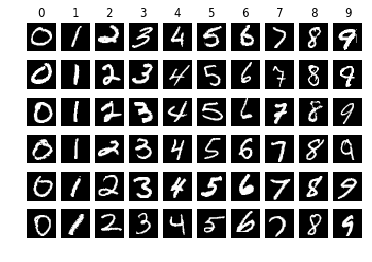

In [3]:
# display some example data
num_disp = 6 # number of examples to display per class
for label in range(0, num_classes):
    img_idxs = np.random.choice(np.where(train_labels==label)[0], num_disp, replace=False)
    for i, img_idx in enumerate(img_idxs):
        plt.subplot(num_disp, num_classes, i * num_classes + label + 1)
        plt.imshow(train_data[img_idx].reshape((28, 28)), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(label)
plt.show()

<span style="color:#cc0000">Lomuto: </span>Not a bad start, Hoare. Looks like Michael has a feel for the properties of the data he's working with.

<span style="color:#0000cc">Hoare: </span>Most definitely, Lomuto and it's a crucial step for any data scientist to know what his data looks like.

<span style="color:#cc0000">Lomuto: </span>And quite literally so, since Michael's gone ahead and visually displayed some of his examples.

<span style="color:#0000cc">Hoare: </span>It would've been nice if he also included some graphs of things like, I don't know, means, variances, correlations, summary statistics, you know?

<span style="color:#cc0000">Lomuto: </span>Hmm I see what you're saying, Hoare, but I'm not sure if that would help much in an image recognition competition like this one.

<span style="color:#0000cc">Hoare: </span>Maybe I'm just a sucker for beautiful graphs.

<span style="color:#cc0000">Lomuto: </span>Well, who isn't?

## Semi-Finals: Preprocessing

In [4]:
train_data = np.array([image.reshape((1, 28, 28)) for image in train_data])
train_labels = to_categorical(train_labels, num_classes=10)

<span style="color:#0000cc">Hoare: </span>Oh, look at this, Lomuto. Earlier we were talking about how each example was already given in the dataset as a single row for easier computations.

<span style="color:#cc0000">Lomuto: </span>That's right, Hoare, and sometimes it makes sense to leave it in vector form, especially for kernel-based classification methods.

<span style="color:#0000cc">Hoare: </span>But Michael's actually reshaping each row into two-dimensional squares!

<span style="color:#cc0000">Lomuto: </span>Yes he is! I'd say this is a buildup to a convolutional neural net, Hoare.

<span style="color:#0000cc">Hoare: </span>Always a solid approach, especially for high-dimensional data like images.

## Final Round: Training the Model

In [5]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', data_format='channels_first', input_shape=(1, 28, 28)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.fit(train_data, train_labels, epochs=5, batch_size=32)

Epoch 1/5
42000/42000 [==============================] - 108s - loss: 0.9940 - acc: 0.7609   
Epoch 2/5
42000/42000 [==============================] - 106s - loss: 0.2586 - acc: 0.9317   
Epoch 3/5
42000/42000 [==============================] - 105s - loss: 0.2114 - acc: 0.9467   
Epoch 4/5
42000/42000 [==============================] - 106s - loss: 0.2124 - acc: 0.9518   
Epoch 5/5
42000/42000 [==============================] - 119s - loss: 0.2319 - acc: 0.9520   


<span style="color:#cc0000">Lomuto: </span>Look at that accuracy!

<span style="color:#0000cc">Hoare: </span>95%, right out the gates!

<span style="color:#cc0000">Lomuto: </span>For the folks watching at home, Michael here has taken three convolutional layers with 3x3 filters and ReLU activation, and fed each one right into max-pooling layers with 2x2 filters.

<span style="color:#0000cc">Hoare: </span>Then he flattened his feature map to hook it up to a fully-connected layer with ReLU, followed by a 50% dropout layer, and closing off with a softmax-activated fully-connected layer for class scores.

<span style="color:#cc0000">Lomuto: </span>Optimized with rmsprop and cross entropy loss.

<span style="color:#0000cc">Hoare: </span>Would've been nice if he used some cross validation or just anything at all to tune hyperparameters, but 95% to start isn't bad.

<span style="color:#cc0000">Lomuto: </span>Right you are, and I'm sure Michael is thinking the same thing. Now we'll go ahead and pass this along to our judges, thanks for watching and we'll see you over on the Kaggle leaderboard!

## Scoring: Testing the Model

In [7]:
test_data = np.array([image.reshape((1, 28, 28)) for image in np.genfromtxt("test.csv", skip_header=1, delimiter=',')])
ids = np.arange(1, test_data.shape[0] + 1).reshape((-1, 1))

In [8]:
test_predict = np.argmax(model.predict(test_data, batch_size=128), axis=1).reshape((-1, 1))

In [9]:
np.savetxt("submission.csv", np.hstack((ids, test_predict)), fmt='%.0f', header="ImageId,Label", delimiter=',', comments='')